In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from sympy import *
import scipy.linalg as la

In [8]:
#Energy in eV and rho in g cm^-3

def Matter_parameters(E, vcc0, Deltam_21, Deltam_31,theta_12,theta_13,theta_23,delcp):
  c12, c13, c23 = np.cos(theta_12), np.cos(theta_13), np.cos(theta_23)
  s12, s13, s23 = np.sin(theta_12), np.sin(theta_13), np.sin(theta_23)
  delcp_phase = np.exp(1j * delcp)
  U23 = np.array([ [1,0,0],[0,c23,s23],[0,-s23,c23] ])
  U13 = np.array([ [c13,0,s13*delcp_phase.conjugate()],[0,1,0],[-s13*delcp_phase,0,c13] ])
  U12 = np.array([ [c12,s12,0],[-s12,c12,0],[0,0,1] ])
  U3 = U23 @ U13 @ U12
  U3_dag = U12.T @ U13.conj().T @ U23.T

  #Re-evaluating the M2 with the E parameter for the function
  m0=1.e-12
  M2 = np.array([[m0,0,0],[0,m0+Deltam_21/2./E,0],[0,0,m0+Deltam_31/2./E]])

  #Hamiltonian in flavour basis
  H = U3 @ M2 @ U3_dag

  #Potential in matter
  vcc = np.array([[vcc0,0.,0.],[0.,0.,0.],[0.,0.,0.]])

  #Hamiltonian in flavor basis in matter
  Hmat = H + vcc

  #eigenvalues
  eigvals, eigvecs = la.eig(Hmat)

  #testing if real
  eigphases = [np.abs(cmath.phase(eig)) for eig in eigvals]
  if np.max(eigphases) > 1e-10:
    print('something weird with eigenvalues')
    print(eigvals,eigphases)
    print()
  eigvals = eigvals.real

  eigvals = eigvals-m0
  #sorting eigenvalues list
  id_sor = np.argsort(eigvals)

  #adding eigenvaues to a list
  eval1 = eigvals[id_sor[0]]
  eval2 = eigvals[id_sor[1]]
  eval3 = eigvals[id_sor[2]]

  #collecting eigenvectors from sorted eigenvalues
  eve1 = eigvecs[:,id_sor[0]]
  eve2 = eigvecs[:,id_sor[1]]
  eve3 = eigvecs[:,id_sor[2]]

  #Eigenvector for electron neutrino spectrum
  Ue1 = eve1[0]
  Ue2 = eve2[0]
  Ue3 = eve3[0]
  #Eigenvector for muon neutrino spectrum
  Umu1 = eve1[1]
  Umu2 = eve2[1]
  Umu3 = eve3[1]
  #Eigenvector for tau neutrino spectrum
  Utau1 = eve1[2]
  Utau2 = eve2[2]
  Utau3 = eve3[2]

  jarlskog=Umu3*Ue2*Umu2.conjugate()*Ue3.conjugate()
  s13=abs(Ue3)
  c13=np.sqrt(1-s13**2)
  c12=abs(Ue1)/c13
  s12=abs(Ue2)/c13
  s23=abs(Umu3)/c13
  c23=abs(Utau3)/c13
  sin_dcp=jarlskog.imag/(s12*c12*s23*c23*s13*c13**2)
  cos_dcp=(jarlskog.real/(s12*s23*s13*c13**2)+s12*s23*s13)/(c12*c23)
  dcp=np.arcsin(sin_dcp)
  if(cos_dcp < 0): dcp = np.pi-dcp

# real Ue1 and Ue2
  ue1phase=cmath.phase(Ue1)
  Ue1=Ue1*np.exp(-1j * ue1phase)
  Umu1=Umu1*np.exp(-1j * ue1phase)
  Utau1=Utau1*np.exp(-1j * ue1phase)

  ue2phase=cmath.phase(Ue2)
  Ue2=Ue2*np.exp(-1j * ue2phase)
  Umu2=Umu2*np.exp(-1j * ue2phase)
  Utau2=Utau2*np.exp(-1j * ue2phase)

# imaginary Ue3 from delta_CP 
  ue3phase=cmath.phase(Ue3)
  Ue3=Ue3*np.exp(-1j * (ue3phase+dcp))
  Umu3=Umu3*np.exp(-1j * (ue3phase+dcp))
  Utau3=Utau3*np.exp(-1j * (ue3phase+dcp))

# Absorbing phases in Umu3 and Utau3 into Majorana and rewriting as real
  alpha=cmath.phase(Umu3)
  beta=cmath.phase(Utau3)
  Umu1=Umu1*np.exp(-1j * alpha)
  Umu2=Umu2*np.exp(-1j * alpha)
  Umu3=Umu3*np.exp(-1j * alpha)
  Utau1=Utau1*np.exp(-1j * beta)
  Utau2=Utau2*np.exp(-1j * beta)
  Utau3=Utau3*np.exp(-1j * beta)

  #Lists with Uei and eigenvalues to be returned
  Ue = [Ue1, Ue2, Ue3]
  Umu = [Umu1, Umu2, Umu3]
  Utau = [Utau1, Utau2, Utau3]
  m_eva = [eval1, eval2, eval3]

  return Ue, Umu, Utau, alpha, beta, m_eva

# testing 
# Deltam_21=8.e-5
# Deltam_31=2.5e-3
# theta_12=0.59
# theta_13 = 0.3    #148
# theta_23= 0.738
# c12, c13, c23 = np.cos(theta_12), np.cos(theta_13), np.cos(theta_23)
# s12, s13, s23 = np.sin(theta_12), np.sin(theta_13), np.sin(theta_23)
# enu=10.       #Neutrino energy in MeV
# Gf = 1.16632  #10^{-23} suppressed
# Na = 6.022    #10^{+23} suppressed
# Yp=0.5
# rho=1.e5
# vcc0 = np.sqrt(2.)*Yp*rho*Gf*Na/((5.068e4)**3)
# delcp=0.3*np.pi
# Ue, Umu, Utau, alpha, beta, m_eva = Matter_parameters(enu*1.e6, vcc0, Deltam_21, Deltam_31,theta_12,theta_13,theta_23,delcp)
# 
# print(Ue)
# print(Umu)
# print(Utau)
# print()
# print(m_eva)
# print()
# print(alpha,beta)

In [9]:
################################################################
################### Varying Parameters #########################
################################################################

Deltam_21=8.e-5
Deltam_31=2.5e-3
theta_12=0.59
theta_13 = 0.148
theta_23= 0.738
c12, c13, c23 = np.cos(theta_12), np.cos(theta_13), np.cos(theta_23)
s12, s13, s23 = np.sin(theta_12), np.sin(theta_13), np.sin(theta_23)
enu=10.       #Neutrino energy in MeV
Gf = 1.16632  #10^{-23} suppressed
Na = 6.022    #10^{+23} suppressed
Yp=0.5

################################################################
################ Fixed delcp and varying density ###############
delcp=.3*np.pi
rho_list=np.linspace(0, 6, num=200, endpoint=True) 
rho_list=10.**rho_list                            #rho in g/cm^3
vcc = np.sqrt(2.)*Yp*rho_list*Gf*Na/((5.068e4)**3)

alpha_rho=[]
beta_rho=[]
del_cp=[]
m1m = []
m2m = []
m3m = []
for i in range(len(rho_list)):
  vcci=vcc[i]
  Ue, Umu, Utau, alpha, beta, m_eva = Matter_parameters(enu*1.e6, vcci, Deltam_21, Deltam_31,theta_12,theta_13,theta_23,delcp)
  del_cp.append(-cmath.phase(Ue[2]))
  alpha_rho.append(alpha)
  beta_rho.append(beta)
  m1m.append(m_eva[0])
  m2m.append(m_eva[1])
  m3m.append(m_eva[2])

################################################################
################ Fixed density and varying delcp ###############
rho=1.e5
vcc0 = np.sqrt(2.)*Yp*rho*Gf*Na/((5.068e4)**3)
delcp_list=np.linspace(0, 2., num=200, endpoint=True)

alpha_cp=[]
beta_cp=[]
del_cp=[]
dtmp=[]
dcomp=[]
t23m=[]
for i in range(0,len(delcp_list)):
  delcp=delcp_list[i]*np.pi
  Ue, Umu, Utau, alpha, beta, m_eva = Matter_parameters(enu*1.e6, vcc0, Deltam_21, Deltam_31,theta_12,theta_13,theta_23,delcp)
  c13m = np.sqrt(1-abs(Ue[2]**2))
  c23m = abs(Utau[2])/c13m
  t23m.append(np.arccos(c23m))
  dcp=-cmath.phase(Ue[2])
  if(dcp < 0): dcp=2.*np.pi+dcp
  dcomp.append(dcp-delcp)
  alpha_cp.append(alpha)
  beta_cp.append(beta)



[Text(0, -0.15000000000000002, ''),
 Text(0, -0.10000000000000002, ''),
 Text(0, -0.05000000000000002, ''),
 Text(0, 0.0, ''),
 Text(0, 0.04999999999999999, ''),
 Text(0, 0.09999999999999998, ''),
 Text(0, 0.15000000000000002, '')]

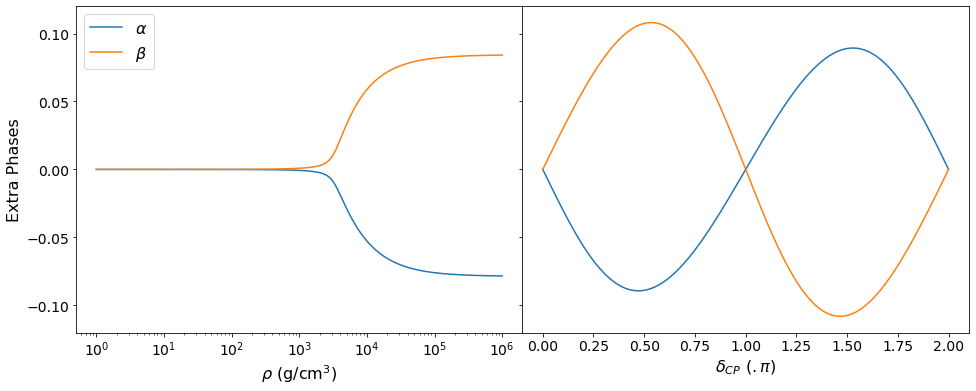

In [10]:
fix, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))
plt.subplots_adjust(wspace=0, hspace=0)

ax1.plot(rho_list,alpha_rho)
ax1.plot(rho_list,beta_rho)
ax1.set_xlabel(r"$\rho$ (g/cm$^3$)",fontsize = 16)
ax1.set_ylabel(r"Extra Phases",fontsize = 16)
ax1.set_xscale("log")
ax1.legend(["$\\alpha$", "$\\beta$"],fontsize=16)#, bbox_to_anchor=(0.15,.42))
ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)
ax1.set_ylim((-0.12,0.12))


ax2.plot(delcp_list,alpha_cp)
ax2.plot(delcp_list,beta_cp)
ax2.set_xlabel(r"$\delta_{CP} ~(. \pi)$",fontsize=16)
ax2.tick_params(axis="x", labelsize=14)
ax2.set_ylim((-0.12,0.12))
ax2.set_yticklabels([])


Text(0, 0.5, '$\\Delta(\\delta_{CP}) ~(. \\pi)$')

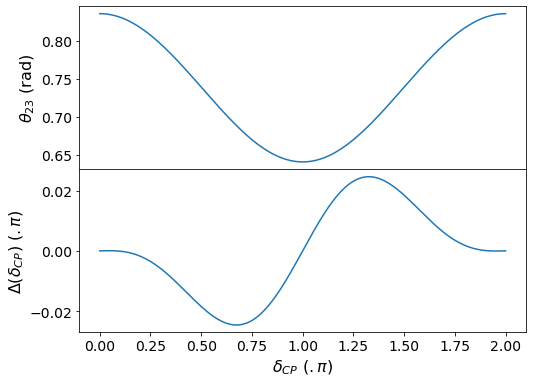

In [11]:
fix, (ax1, ax2) = plt.subplots(2,figsize=(8,6))
plt.subplots_adjust(wspace=0, hspace=0)

ax1.plot(delcp_list,t23m)
ax1.tick_params(axis="y", labelsize=14)
ax1.set_ylabel(r"$\theta_{23}$ (rad)",fontsize=16)

ax2.plot(delcp_list,dcomp)
ax2.set_xlabel(r"$\delta_{CP} ~(. \pi)$",fontsize=16)
ax2.tick_params(axis="x", labelsize=14)
ax2.tick_params(axis="y", labelsize=14)
ax2.set_ylabel(r"$\Delta(\delta_{CP}) ~(. \pi)$",fontsize=16)